# Assignment_3 DT

In [28]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Part 1 Decision Tree


In [29]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
tree_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

## Q1 Plot decision tree using export_graphviz

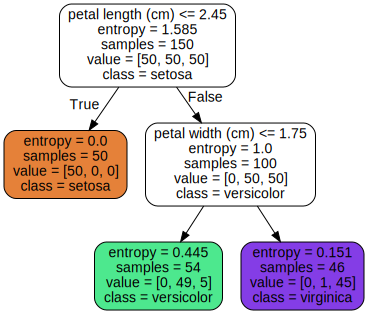

In [30]:
# Answer:

from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join("./", "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join("./", "iris_tree.dot"))



## Q2 Plotting decision boundaries

Use the following function to plot the decision boundaries of DT from Q1

In [31]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

Plotting for max_depth = 2

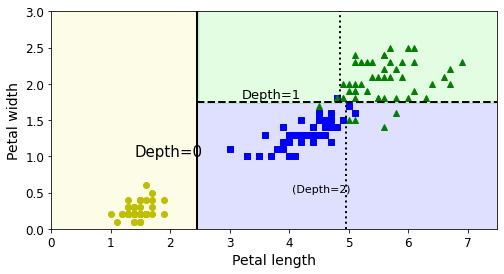

In [32]:
plt.figure(figsize=(8, 4))

plot_decision_boundary(tree_clf, X, y)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

### Q2.1
- Train the decision tree using a maximum depth of 1.
- Plot the decision tree using graphviz
- Use the above function to plot the decision boundaries

**Question**
1. After plotting the resulting tree.
    - What's the output entropy in each block?
    - Comment on the entropy values in each block.
2. What's the difference in decision trees between using max_depth = 1, max_depth = 2, max_depth = 10? *Hint: Plot the tree in each case*

**Answer**

1. 


Entropy for first block = 1.585--->very low information gain, this means a decision cannot be taken now.

Entropy for left block =0 ---> high information gain, this means you can take a decision and be sure that you made the right decision.


Entropy for right block =1 --->low  information gain.
this means that the two decision are equal.

the entropy of the level 3 blocks 0.445,0.151 are very low entropy which means you have high information gain and the probability of choosing right is high



2. max depth = 1 was not a good tree as we can see the entopy at the leaf node is 1 which is low information gain so we needed to lower this entropy with another level so at max depth= 2 
we now have entropy =0,0.445,0.151 which is good, at max depth =10 we will see that the descision tree tends to get a pure class at each leaf node so over fitting training data 




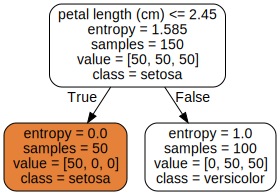

In [33]:
####### YOUR CODE HERE
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from graphviz import Source
from sklearn.tree import export_graphviz

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

mytree = DecisionTreeClassifier(max_depth=1, random_state=42, criterion='entropy')
mytree.fit(X, y)


export_graphviz(
        mytree,
        out_file=os.path.join("./", "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join("./", "iris_tree.dot"))




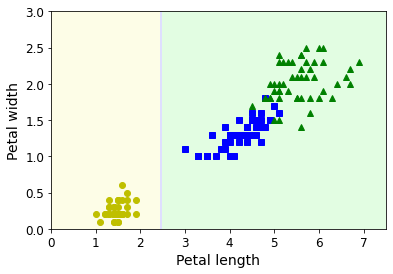

In [34]:
plot_decision_boundary(mytree, X, y)

### Q2.2

**Question**
1. Calculate probabilities of all classes on this data point X = [[5, 1.5]] using decision tree with max_depth = 2
2. Compare your result with "predict_proba" function.

**Answer**
1. at first level we choose false
then level two we choose true 
so the probabilitis are 0/54,49/54,5/54
which is the same as "predict_proba" function.

In [35]:
######### Your code for (2.)
X=[[5,1.5]]
tree_clf.predict_proba(X)

array([[0.        , 0.90740741, 0.09259259]])

## Question 3 Sensitivity to data

### Q3.1 Decision Tree
**Question**
1. Fit a decision tree classifier max_depth = 2, to the original data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

0.96


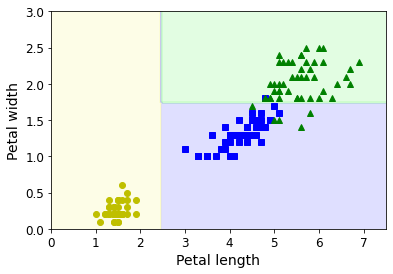

In [36]:
##### YOUR CODE HERE
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
tree_clf.fit(X, y)
plot_decision_boundary(tree_clf, X, y)
print(tree_clf.score(X,y))

The following cell rotates the data by angle 20

In [37]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

**Question**
1. Fit another decision tree classifier max_depth = 2, to the rotated data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

0.9733333333333334


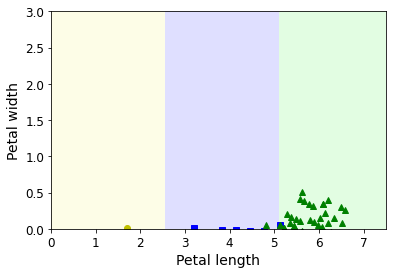

In [38]:
##### YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier
tree_clf_rotated = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
tree_clf_rotated.fit(Xr, y)
plot_decision_boundary(tree_clf_rotated, Xr, y)
print(tree_clf_rotated.score(Xr,y))

### Q3.2 Logistic Regression
The following function plots the decision boundaries for a logistic regression classifier

In [39]:
import numpy as np
def plot_logistic_regression(clf, X, y, iris=True):

  x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  h = 0.02  # step size in the mesh
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

  plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
  plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
  
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
  else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
  plt.legend(loc="lower right", fontsize=14)
  plt.show()

**Question**

1. Fit a logistic regression classifier to the original data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

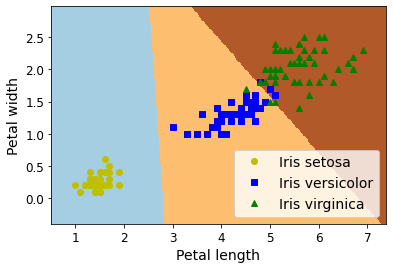

0.9666666666666667


In [40]:
##### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X,y)
plot_logistic_regression(clf, X, y)
print(clf.score(X,y))


**Question**
1. Fit another logistic regression classifier to the rotated data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

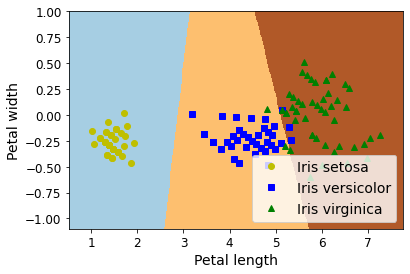

0.9666666666666667


In [41]:
###### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
clf_rotated = LogisticRegression(random_state=42)
clf_rotated.fit(Xr,y)
plot_logistic_regression(clf_rotated, Xr, y)
print(clf_rotated.score(Xr,y))



### Q3.3
1. Comment on the differences between the logistic regression and decision trees classifiers scores to the original and rotated data
2. Explain why that happened?

**Answer**

1.for decision trees scores gets better with rotated data, in case of logistic regression the scores dont change with rotated data.

2.im not sure but im guessing that it changes for decision tree because in decision boundaries,  boundaries are vertical and horizontal lines so rotation of data gets you a new boundries
but logistic regression boundaries can get any slope 
so rotated data gets you rotated poundries so over all no change .


## Question 4 GridSearch

1. Generate a moons dataset using `make_moons(n_samples=10000, noise=0.4)`.

In [42]:
from sklearn.datasets import make_moons
X,y=make_moons(n_samples=10000, noise=0.4)


2. Split it into a training set and a test set using train_test_split().

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)


3. Use grid search with cross-validation (with the help of the GridSearchCV class) to find best hyperparameter (max_depth, max_leaf_nodes, min_samples_split) values for a DecisionTreeClassifier. 
    - Choose reasonable values for each hyperparameter.
    - Apply GridSearch on a portion of training data.

In [44]:
from sklearn.model_selection import GridSearchCV
import numpy as np
clf = DecisionTreeClassifier()
max_depth=[1,2,3,4]
max_leaf_nodes=[2,3,4]
min_samples_split=[2,3,4]
param_grid = {'max_depth': max_depth, 'max_leaf_nodes':max_leaf_nodes, 'min_samples_split': min_samples_split }
g_search = GridSearchCV(clf, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)
g_search.fit(X_train, y_train)
print(g_search.best_params_)




{'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_split': 2}


4. Train it on the full training set using the best hyperparameters, and measure your model's performance on the test set.

In [45]:
from sklearn.tree import DecisionTreeClassifier
tree_clf_rotated = DecisionTreeClassifier(max_depth=2,max_leaf_nodes=4,min_samples_split=2, random_state=42, criterion='entropy')
tree_clf_rotated.fit(X_train, y_train)
print(tree_clf_rotated.score(X_test, y_test))

0.8578787878787879


## Question 4 Regression Tree

### Question
For the following plot of the two decision tree regressors:
1. Comment on the results
2. Which model has a higher variance error? why?
3. Which model has a higher bias error? why?

**Answer**

1. max depth =5 is ovefitting the data, max depth = 2 is a good decision tree
2. max depth =5 model has higher variance because of the overfitting we get a training score very high but a low test score.
3. max depth =2 model has higher bias because of the low max depth your leaf nodes  are not pure classes unlike the max depth =5 will get high training score
but max depth =2 will get a close test score and max depth =5 will get musch lower test score


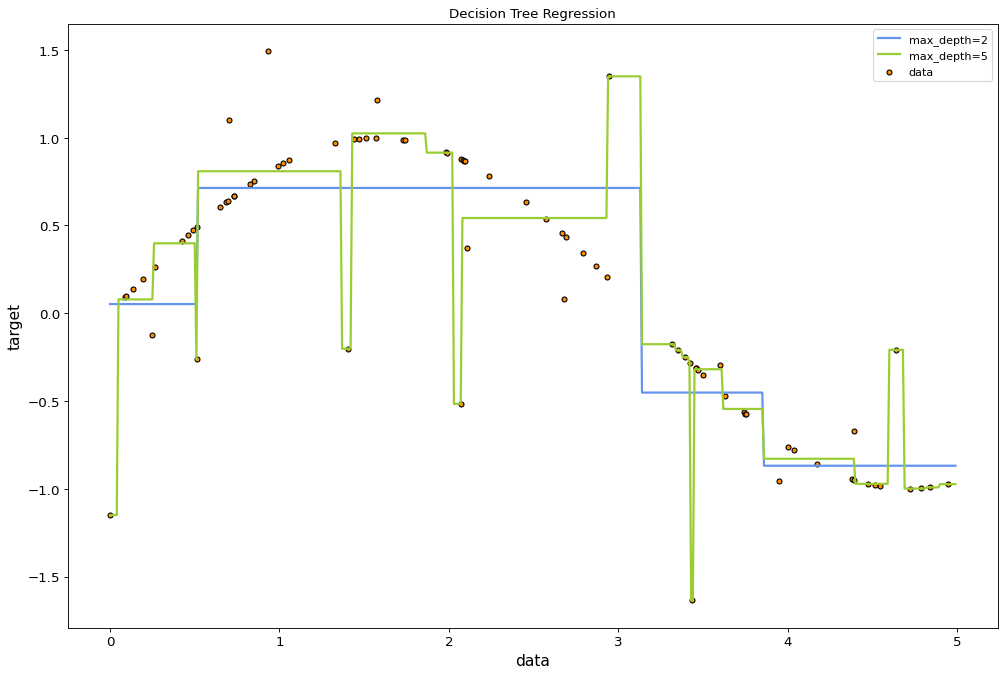

In [46]:
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(15,10),dpi=80)
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()